In [1]:
"""
IPython Notebook v4.0 para python 2.7
Librerías adicionales: numpy, matplotlib
Contenido bajo licencia CC-BY 4.0. Código bajo licencia MIT. (c) Sebastian Flores.
"""

# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import HTML

HTML(open("style/mat281.css", "r").read())

<header class="w3-container w3-teal">
<img src="images/utfsm.png" alt="" height="100px" align="left"/>
<img src="images/mat.png" alt="" height="100px" align="right"/>
</header>
<br/><br/><br/><br/><br/>
# MAT281
## Aplicaciones de la Matemática en la Ingeniería

### Sebastián Flores

https://www.github.com/usantamaria/mat281


## Clase anterior

* Holdout Set

## ¿Qué contenido aprenderemos?

* Cross Validation


## ¿Porqué aprenderemos ese contenido?

* Cross Validation

Esencial para poder estimar el poder predictivo de un modelo cuando se tienen pocos datos o el modelo es costoso de entrenar o evaluar.


## Modelo

Ilustraremos el funcionamiento del método con datos sintéticos:
$$ y(x) = 5 \cos \Big( \frac{\pi}{4} x \Big) + \mathcal{N}\Big(0,1\Big)$$

Buscaremos ajustar un modelo del tipo
$$ y(x) = a \cos \Big( b x + c\Big) + d$$
minimizando el error cuadrático.

El error predictivo del modelo será calculado utilizando RMSE:
$$ E(o,p) = \sqrt{ \frac{1}{N}\sum_{i=1}^N (o_i - p_i)^2 }$$
El RMSE corresponde a la desviación estándar de los residuos.

## 2. Cross Validation

Se realiza de manera secuencial varios procedimientos de Holdout Set. 
Los datos se utilizan para entrenar el modelo o para testear el modelo, pero nunca para ambas simultáneamente.

<img src="images/CrossValidation.png" alt="" width="400px" align="middle"/>

#### 2. Cross Validation
## Características

* Es similar al holdout set.

* Datos son utilizados para entrenar el modelo y para obtener el error de predicción pero nunca simultáneamente.

* Permite obtener estimación de la variablidad del verdadero error de estimación.

#### 2. Cross Validation
## ¿Cuántas y cuales particiones utilizar?

* Pocas particiones: error de predicción será conservador y con poca variabilidad.
* Muchas particiones: error de predicción será realista pero con mucha variabilidad.
* Resulta necesario considerar además el tiempo computacional requerido para entrenar los modelos en cada partición.

#### 2. Cross Validation
## Alternativas

¿Cómo hacermos las particiones?

* Validación Cruzada no Exhaustiva Secuencial.
* Validación Cruzada no Exhaustiva Aleatoria.
* Validación Cruzada: Leave One Out (LOO).
* Validación Cruzada Exhaustiva.

## 2.1 Validación Cruzada No Exhaustiva Secuencial. 

* Se seleccionan $M$ particiones excluyentes: una fracción $(M-1)/M$ para entrenamiento y una fracción $1/M$ para testing.
* Un dato es utilizado una única vez como predicción y $M-1$ veces para entrenamiento.
* Requiere realizar mezclar aleatoriamente los datos al inicio.
* Típicamente 5 particiones de 80%-20% o 10 particiones de 90%-10%.

#### 2.1 Validación Cruzada No Exhaustiva Secuencial. 
## Implementación

Prediction error estimated on  1.00994308811 

Prediction error estimated on  0.951662937165 

Prediction error estimated on  0.986863070779 

Prediction error estimated on  0.998700593761 

Prediction error estimated on  0.981383776418 

Average of prediction error 0.985710693247
Standard Deviation of prediction error 0.0196735678194


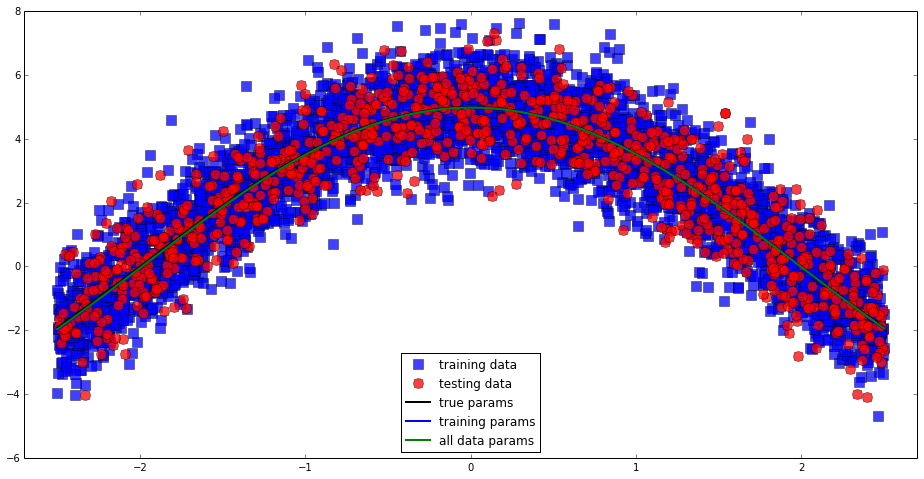

In [3]:
import numpy as np
from mat281_code import model

# Parameters
M = 5 # particiones

# Load data
data = model.load_data("data/dataN5000.txt") # Change here
N = data.shape[0]
testing_size = int(1./M * N)

# Permute the data
np.random.seed(23)   # Change here
data = np.random.permutation(data)

# Create vector to store the prediction error
prediction_error = np.zeros(M)

# Perform Cross Validation
for i in range(M):
    index = np.arange(N)
    testing_index = np.logical_and(i*testing_size < index,
                                    index < (i+1)*testing_size)

    # Do the split
    testing_data = data[testing_index,:]
    training_data = data[np.logical_not(testing_index),:]

    # Train model excluding the holdout set
    training_params = model.get_params(training_data)

    # Test with the holdout set
    prediction_error[i] = model.get_error(training_params, testing_data)
    print "Prediction error estimated on ", prediction_error[i], "\n"

# Train model with all the data
all_data_params = model.get_params(data)

# Report
print "Average of prediction error", prediction_error.mean()
print "Standard Deviation of prediction error", prediction_error.std()

# Plot the model
model.plot(training_data, testing_data, training_params, all_data_params)

#### 2.1 Validación Cruzada No Exhaustiva

## Pro
* Simple de realizar y computacionalmente no TAN intensivo.
* Entrega estimación de variabilidad.

## Contra
* Error de predicción conservador.
* Valor depende de la mezcla aleatoria inicial.

## 2.2 Validación Cruzada No Exhaustiva Aleatoria

* Se generan $M$ holdouts set de manera aleatoria.
* Un dato no necesariamente es utilizado una única vez como predicción.
* Requiere realizar mezclar aleatoriamente los datos en cada selección.
* Típicamente número de muestras depende del costo computacional.

#### 2.2 Validación Cruzada No Exhaustiva Aleatoria
## Implementación

Prediction error estimated on  0.948364300873 

Prediction error estimated on  0.949462621825 

Prediction error estimated on  0.992257301311 

Prediction error estimated on  0.48278378367 

Prediction error estimated on  3.00397056858 

Prediction error estimated on  0.953214416329 

Prediction error estimated on  0.0603291009182 

Prediction error estimated on  1.38188037756 

Prediction error estimated on  0.90662739845 

Prediction error estimated on  1.35001790872 

Prediction error estimated on  0.949369474275 

Prediction error estimated on  0.436613578676 

Prediction error estimated on  0.950502064634 

Prediction error estimated on  0.677146426134 

Prediction error estimated on  0.611339385112 

Prediction error estimated on  3.85322021776 

Prediction error estimated on  0.481432966794 

Prediction error estimated on  0.821342528234 

Prediction error estimated on  0.940982871676 

Prediction error estimated on  1.35020441075 

Prediction error estimated on  0.828181585607 

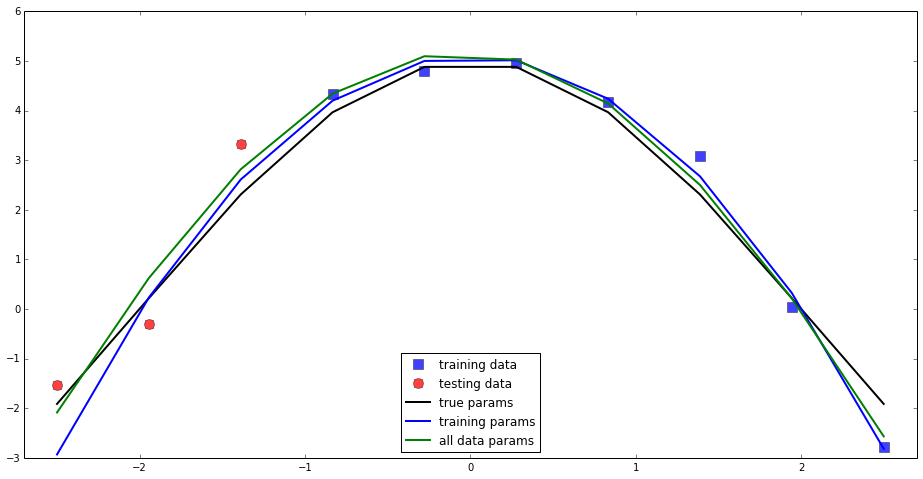

In [12]:
import numpy as np
from mat281_code import model

# Parameters
M = 200 # Muestras

# Load data
data = model.load_data("data/dataN10.txt")  # Change here
N = data.shape[0]
split = int(0.7*N)   # Change here

# Create vector to store the prediction error
prediction_error = np.zeros(M)

for i in range(M):
    # Permute the data
    np.random.seed(i)   # HERE IS THE MAIN POINT #
    data = np.random.permutation(data)

    # Do the split
    training_data = data[:split,:]
    testing_data = data[split:,:]

    # Train model excluding the holdout set
    training_params = model.get_params(training_data)

    # Test with the holdout set
    prediction_error[i] = model.get_error(training_params, testing_data)
    print "Prediction error estimated on ", prediction_error[i], "\n"

# Train model with all the data
all_data_params = model.get_params(data)

# Report
print "Average of prediction error", prediction_error.mean()
print "Standard Deviation of prediction error", prediction_error.std()

# Plot the model
model.plot(training_data, testing_data, training_params, all_data_params)

#### 2.2 Validación Cruzada No Exhaustiva Aleatoria

## Pro
* Simple de realizar pero computacionalmente intensivo.
* Entrega muy buenos resultados.

## Contra
* Error de predicción depende del número de muestras.
* Valor puede depender de aleatoriedad.

## 2.3 Leave One Out (LOO)

Si el número de datos $N$ es pequeño, se hacen $N$ particiones. Se entrena con $N-1$ datos y se prueba con $1$ datos.

* Fácil de implementar
* **NO** Requiere realizar mezclar aleatoriamente los datos al inicio.

#### 2.3 Leave One Out (LOO)
## Implementación

Prediction error estimated on  0.487363662572
Prediction error estimated on  1.32126503592
Prediction error estimated on  1.3210098921
Prediction error estimated on  0.308664334069
Prediction error estimated on  1.68306654963
Prediction error estimated on  2.12700528717
Prediction error estimated on  0.215841838004
Prediction error estimated on  0.51963026848
Prediction error estimated on  0.391666155524
Prediction error estimated on  1.39218969175
Prediction error estimated on  1.25506143631
Prediction error estimated on  0.281477743992
Prediction error estimated on  0.921278213388
Prediction error estimated on  1.83088753987
Prediction error estimated on  0.0361694042757
Prediction error estimated on  0.168635485307
Prediction error estimated on  0.594083824625
Prediction error estimated on  1.36598426966
Prediction error estimated on  0.622828922056
Prediction error estimated on  1.18608362578
Average of prediction error 0.901509659024
Standard Deviation of prediction error 0.601368

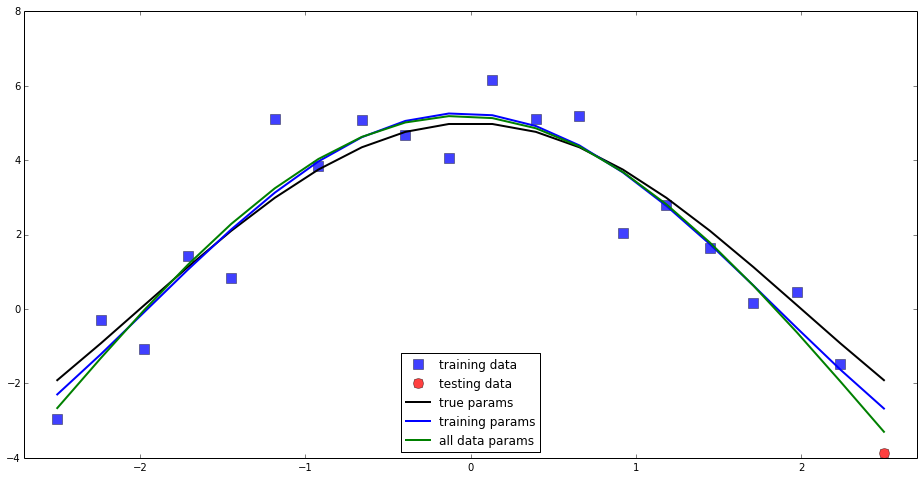

In [13]:
import numpy as np
from mat281_code import model

# Parameter free (M=N)

# Load data
data = model.load_data("data/dataN20.txt")  # Change here
N = data.shape[0]

# Create vector to store the prediction error
prediction_error = np.zeros(N)

for i in range(N):
    
    testing_index = np.zeros(N, dtype=bool)
    testing_index[i] = True

    # Do the split
    testing_data = data[testing_index,:]
    training_data = data[np.logical_not(testing_index),:]

    # Train model excluding the holdout set
    training_params = model.get_params(training_data)

    # Test with the holdout set
    prediction_error[i] = model.get_error(training_params, testing_data)
    print "Prediction error estimated on ", prediction_error[i]

# Train model with all the data
all_data_params = model.get_params(data)

# Report
print "Average of prediction error", prediction_error.mean()
print "Standard Deviation of prediction error", prediction_error.std()

# Plot the model
model.plot(training_data, testing_data, training_params, all_data_params)

#### 2.3 Validación Cruzada: Leave One Out

## Pro
* No es necesario configurar: tamaño y numero de particiones fijo.
* Completamente exhaustivo: no contiene aleatoriedad.

## Contra
* Computacionalmente intensivo: sólo para modelos "baratos" de conseguir y tamaños de datos pequeños.
* Estimación de error optimista con posibilidad de sobreajuste.


## 2.4  Validación Cruzada Exhaustiva

* Sólo es posible cuando se tiene un número bajo de datos.
* Se fija  el holdout set (por ejemplo, 70-30), y se prueban todas las combinaciones posibles.

In [4]:
from scipy.misc import comb
N = 10
split = int(0.7*N)
print comb(N,split)

120.0



#### 2.4 Validación Cruzada Exhaustiva
## Implementación

In [18]:
import numpy as np
from mat281_code import model

import itertools # Library to get the permutations
from scipy.misc import comb

# Load data
data = model.load_data("data/dataN20.txt")  # Change here
N = data.shape[0]
split = int(0.7*N)
M = int(comb(N,split))

# Create vector to store the prediction error
prediction_error = np.zeros(M)
index = np.arange(N)

for i, training_index in enumerate(itertools.combinations(index,split)):
                                
    # Do the split
    training_data = data[np.array(training_index),:]
    testing_index = list(set(range(N))-set(training_index))
    testing_data = data[np.array(testing_index),:]

    # Train model excluding the holdout set
    training_params = model.get_params(training_data)

    # Test with the holdout set
    prediction_error[i] = model.get_error(training_params, testing_data)

# Train model with all the data
all_data_params = model.get_params(data)

# Report
print "Average of prediction error", prediction_error.mean()
print "Standard Deviation of prediction error", prediction_error.std()

# Plot the model
model.plot(training_data, testing_data, training_params, all_data_params)

IndexError: index 38759 is out of bounds for axis 0 with size 38759

#### 2.4 Validación Cruzada Exhaustiva

## Pro
* No es necesario configurar: tamaño y número de particiones fijo.
* Completamente exhaustivo: no contiene aleatoriedad.

## Contra
* Computacionalmente muy intensivo: sólo para modelos "baratos" de conseguir y tamaños de datos muy pequeños. Utilizar sólo si datos son extremadamente escasos.
* Estimación de error optimista con posibilidad de sobreajuste, debido a pocos datos. 
* Modelo es malo, pero sabemos que tan malo es.

#### Validación Cruzada

## Resumen

En general, conviene siempre utilizar Validación Cruzada:
* Permite estimar error de predicción más precisamente: promedio es más preciso y se conoce su variablidad.
* Único problema: costo computacional.

#### Validación Cruzada

## Consejos

* Si $N<10$, vaya a buscar más datos. No se moleste en ajustar un modelo.
* Si $N>10$, prefiera:
  * Cross Validation No Exhaustivo Aleatorio. 
  * Cross Validation No Exhaustivo Secuencial.
* Si $N>1000$, utilice Cross Validation Secuencial (5 pasadas al 20-80).

## Normas
Se dice que $||\cdot||$ es una norma de un espacio vectorial $V$ sobre el cuerpo $R$ si se cumple:

* Positividad:
$$||x|| ≥ 0 ∀x ∈ V y ||x|| = 0 =⇒ x = 0$$
* Escalabilidad:
$$||αx|| = |α| ||x|| ∀x ∈ V y α ∈ R$$
* Desigualdad Triangular:
$$||x + y || ≤ ||x|| + ||y|| ∀x, y ∈ V$$

## Normas
Para $x$ en $R^n$ podemos definir, entre otros:
* Norma 1, de Manhattan o del taxista:
$$||x||_1 = \sum_{i=1}^n |x_i|$$

* Norma 2 o euclidiana:
$$||x||_1 = \sqrt{ \sum_{i=1}^n x_i^2 }$$

* Norma Infinito:
$$||x||_{\infty} = \max_{i=1, ..., n} |x_i|$$


## Implementación de Norma 1

In [1]:
import numpy as np
from numpy import linalg

def norm_1_very_wrong(x):
    norm1 = 0
    for i in range(len(x)):
        norm1 = norm1 + abs(x[i])
    return norm1

def norm_1_wrong(x):
    norm1 = 0
    for xi in x: # Dont use the index if possible
        norm1 += abs(xi)
    return norm1

def norm_1_better(x):
    return np.abs(x).sum()

def norm_1(x):
    return linalg.norm(x,1)

In [7]:
my_big_vector = np.random.rand(100000)
%timeit norm_1_very_wrong(my_big_vector)
%timeit norm_1_wrong(my_big_vector)
%timeit norm_1_better(my_big_vector)
%timeit norm_1(my_big_vector)

10 loops, best of 3: 80.9 ms per loop
10 loops, best of 3: 65.8 ms per loop
1000 loops, best of 3: 638 µs per loop
1000 loops, best of 3: 731 µs per loop


## Implementación de Norma 2

In [9]:
import numpy as np
from numpy import linalg

def norm_2_very_wrong(x):
    norm2 = 0
    for i in range(len(x)):
        norm2 = norm2 + x[i]**2
    return norm2**0.5

def norm_2_wrong(x):
    norm2 = 0
    for xi in x:
        norm2 += xi**2
    return np.sqrt(norm2)

def norm_2_better(x):
    return np.sqrt((x**2).sum())

def norm_2(x):
    return linalg.norm(x,2)

In [12]:
my_big_vector = np.random.rand(100000)
%timeit norm_2_very_wrong(my_big_vector)
%timeit norm_2_wrong(my_big_vector)
%timeit norm_2_better(my_big_vector)
%timeit norm_2(my_big_vector)

10 loops, best of 3: 140 ms per loop
10 loops, best of 3: 117 ms per loop
1000 loops, best of 3: 585 µs per loop
1000 loops, best of 3: 605 µs per loop


## Implementación de Norma $\infty$

In [13]:
import numpy as np
from numpy import linalg

def norm_inf_very_wrong(x):
    norminf = 0
    for i in range(len(x)):
        norminf = max(norminf, abs(x[i]))
    return norminf

def norm_inf_wrong(x):
    norminf = 0
    for xi in x:
        norminf = max(norminf, abs(xi))
    return norminf

def norm_inf_better(x):
    return np.abs(x).max()

def norm_inf(x):
    return linalg.norm(x,np.inf)

In [14]:
my_big_vector = np.random.rand(100000)
%timeit norm_inf_very_wrong(my_big_vector)
%timeit norm_inf_wrong(my_big_vector)
%timeit norm_inf_better(my_big_vector)
%timeit norm_inf(my_big_vector)

10 loops, best of 3: 103 ms per loop
10 loops, best of 3: 88.8 ms per loop
1000 loops, best of 3: 500 µs per loop
1000 loops, best of 3: 548 µs per loop


## Conclusiones

* Utilice ciclo for apropiadamente, sólo si es necesario.
* Si existe, utilice la función al más bajo nivel, ya implementada en alguna librería.

In [15]:
linalg.norm?

## Normas Equivalentes: Definicion
Las normas $||\cdot||_a$ y $||\cdot||_b$ se dicen equivalentes en el mismo espacio
vectorial $V$ si existen constantes $\alpha > 0$ y $\beta > 0$ tales que
$$ \alpha \ ||x||_a \leq ||x||_b \leq \beta \ ||x||_a \forall x ∈ V$$

## Normas Equivalentes: Teorema
En $R^n$ todas las normas son equivalentes.

En particular, las normas $||\cdot||_1$ , $||\cdot||_2$ y $||\cdot||_{\infty}$ son equivalentes.

***One norm to rule them all.***

* Norma 2 y norma infinito
$$ \frac{1}{n} ||x||_2 \leq ||x||_{\infty} \leq 1 ||x||_2 $$
* Norma infinito y norma 1
$$||x||_{\infty} \leq ||x||_1 \leq n ||x||_{\infty} $$
* Norma 1 y norma 2
$$\frac{1}{n}||x||_1 \leq ||x||_2 \leq n ||x||_1 $$


En general ([demo](http://math.stackexchange.com/questions/218046/relations-between-p-norms) ):
$$ ||x||_p \leq n^{\frac{1}{p}-\frac{1}{q}} ||x||_q$$



###  Normas Equivalentes: Contra-Teorema
* Normas equivalentes no producen problemas equivalentes.
* No es lo mismo que minimizar en una norma que en otra.

## Ejemplo
Consideremos $R^2$ y $F(x) = F (x_1 , x_2 ) = (x_1 + 1)^2 + (x_2 + 1)^2$ .
Tenemos que claramente
$$ \max_{||x||_1  \leq 1} F(x) \neq  \max_{||x||_2  \leq 1} F(x) \neq  \max_{||x||_{\infty}  \leq 1} F(x)$$
y
$$ \textrm{argmax}_{||x||_1  \leq 1} F(x) \neq  \textrm{argmax}_{||x||_2  \leq 1} F(x) \neq  \textrm{argmax}_{||x||_{\infty}  \leq 1} F(x)$$

<img src="images/Norma1.png" alt="" width="900px" align="middle"/>

<img src="images/Norma2.png" alt="" width="900px" align="middle"/>

<img src="images/NormaInf.png" alt="" width="900px" align="middle"/>

Pero profe, claro, su problema era trivial...

Cómo estaba minimizando sobre espacios distintos era lógico que llega a valores distintos.

Fijemos el espacio de minimización y pongamos la norma en el funcional a minimizar

Consideremos $m, b ∈ R$ y sean ciertos pares de datos
$$(x_1 , y_1 ), (x_2 , y_2 ), ..., (x_n , y_n )$$
que deseamos modelar utilizando $y = mx + b$.

* ¿Los valores de $m$ y $b$ dependen de la norma en la que se minimiza?
* ¿Qué datos podr ́ıamos utilizar? ¿Qué tal el conjunto de Anscombe?

Recordemos que la minimización en norma 2 de cada grupo del cuadrteto de Anscombe daba los mismos parámetros. ¿Que sucede con las otras normas?

<img src="images/Anscombe0.png" alt="" width="600px" align="middle"/>

<img src="images/Anscombe1.png" alt="" width="600px" align="middle"/>

<img src="images/AnscombeII.png" alt="" width="700px" align="middle"/>

<img src="images/AnscombeI.png" alt="" width="700px" align="middle"/>

<img src="images/AnscombeIII.png" alt="" width="700px" align="middle"/>

<img src="images/AnscombeIV.png" alt="" width="700px" align="middle"/>

## Resumen
* Not all norms are born equal.
* Norma $1$ insensible a outliers, pero no es diferenciable.
* Norma $2$ es sensible a outliers, pero es diferenciable.
* Norma $\infty$ es muy sensible a outliers, y no es diferenciable.

Escoger una norma en un problema dado tiene más razones prácticas que teóricas